In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Import Data

In [ ]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality']
# load dataset
data = pd.read_csv("/content/drive/MyDrive/AI_data/Winequality_dataset_final.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0


# Min max values

In [ ]:
fixed_min = data['fixed acidity'].min()
fixed_max = data['fixed acidity'].max()
volatile_min = data['volatile acidity'].min()
volatile_max = data['volatile acidity'].max()
citric_min = data['citric acid'].min()
citric_max = data['citric acid'].max()
residual_min = data['residual sugar'].min()
residual_max = data['residual sugar'].max()
chlorides_min = data['chlorides'].min()
chlorides_max = data['chlorides'].max()
free_min = data['free sulfur dioxide'].min()
free_max = data['free sulfur dioxide'].max()
total_min = data['total sulfur dioxide'].min()
total_max = data['total sulfur dioxide'].max()
density_min = data['density'].min()
density_max = data['density'].max()
sulphates_min = data['sulphates'].min()
sulphates_max = data['sulphates'].max()
alcohol_min = data['alcohol'].min()
alcohol_max = data['alcohol'].max()
quality_min = data['quality'].min()
quality_max = data['quality'].max()

print(fixed_min, fixed_max, volatile_min, volatile_max, citric_min, citric_max, residual_min, residual_max, chlorides_min, chlorides_max, free_min, free_max,total_min, total_max,density_min, density_max,sulphates_min, sulphates_max,alcohol_min, alcohol_max,quality_min, quality_max)

4.6 15.9 0.12 1.58 0.0 1.0 0.9 15.5 0.012 0.611 1.0 72.0 6.0 289.0 0.9900700000000001 1.00369 0.33 2.0 8.4 14.9 0 1


# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality']
data[num_vars] = scaler.fit_transform(data[num_vars])

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.149701,0.215385,1.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.137725,0.153846,0.0


# Data Split

In [ ]:
#split dataset in features and target variable
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','sulphates','alcohol']
X = data[feature_cols] 
y = data.quality
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree Classifier Tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Prediction Using Decision Tree

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Performance of the model

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7625


# Model Visualization

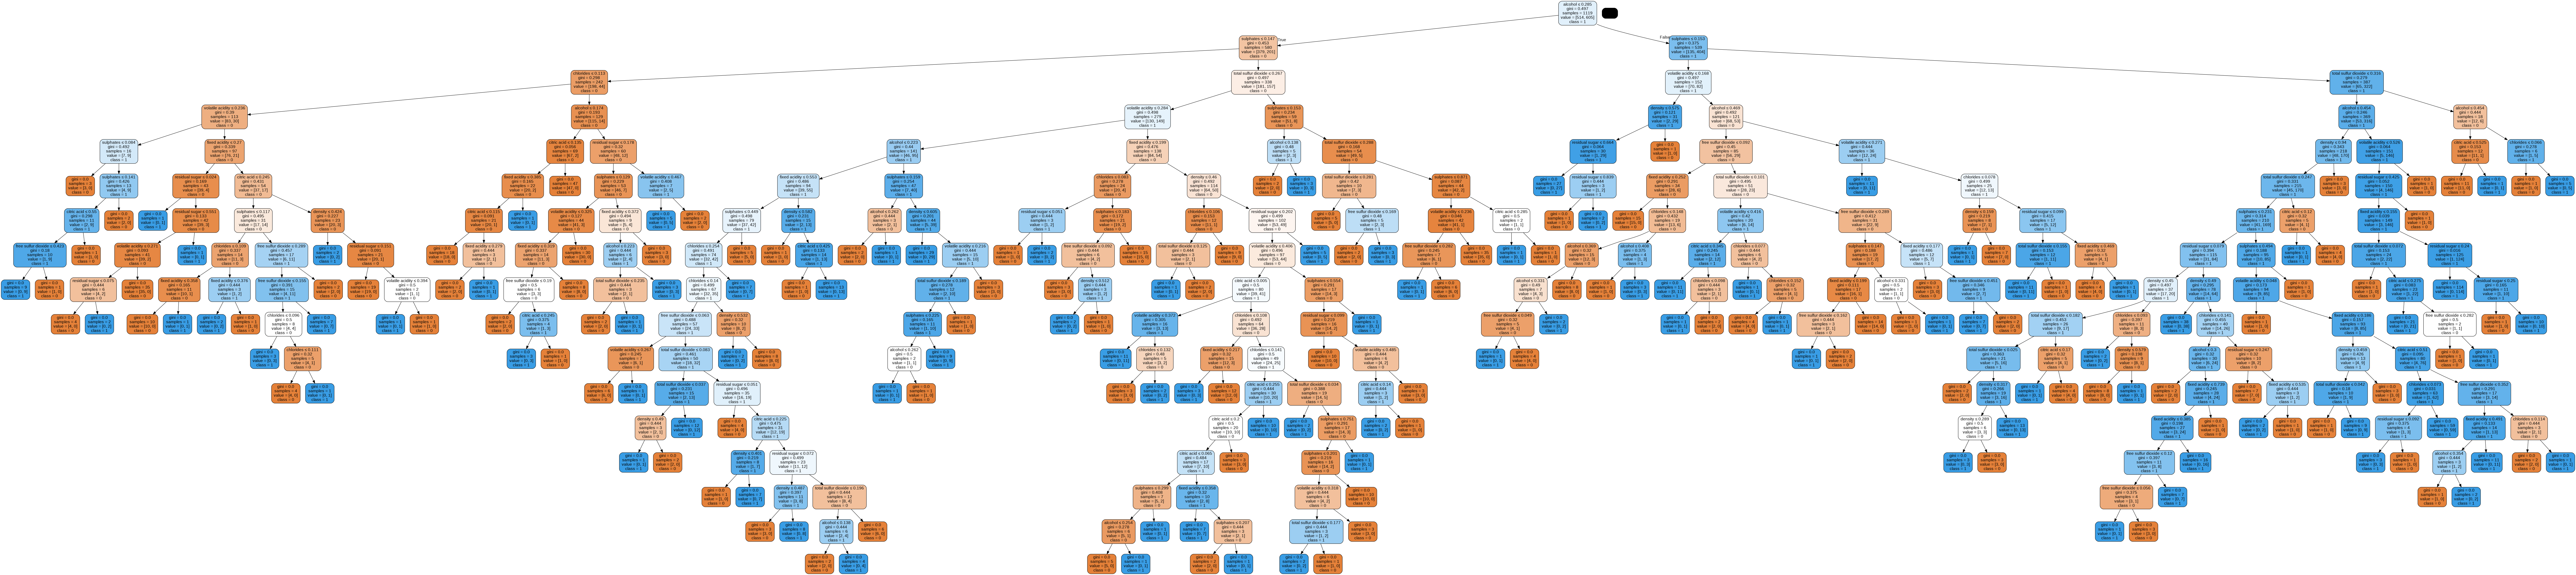

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine_predict.png')
Image(graph.create_png())

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

# Decision Tree Optimization

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7229166666666667


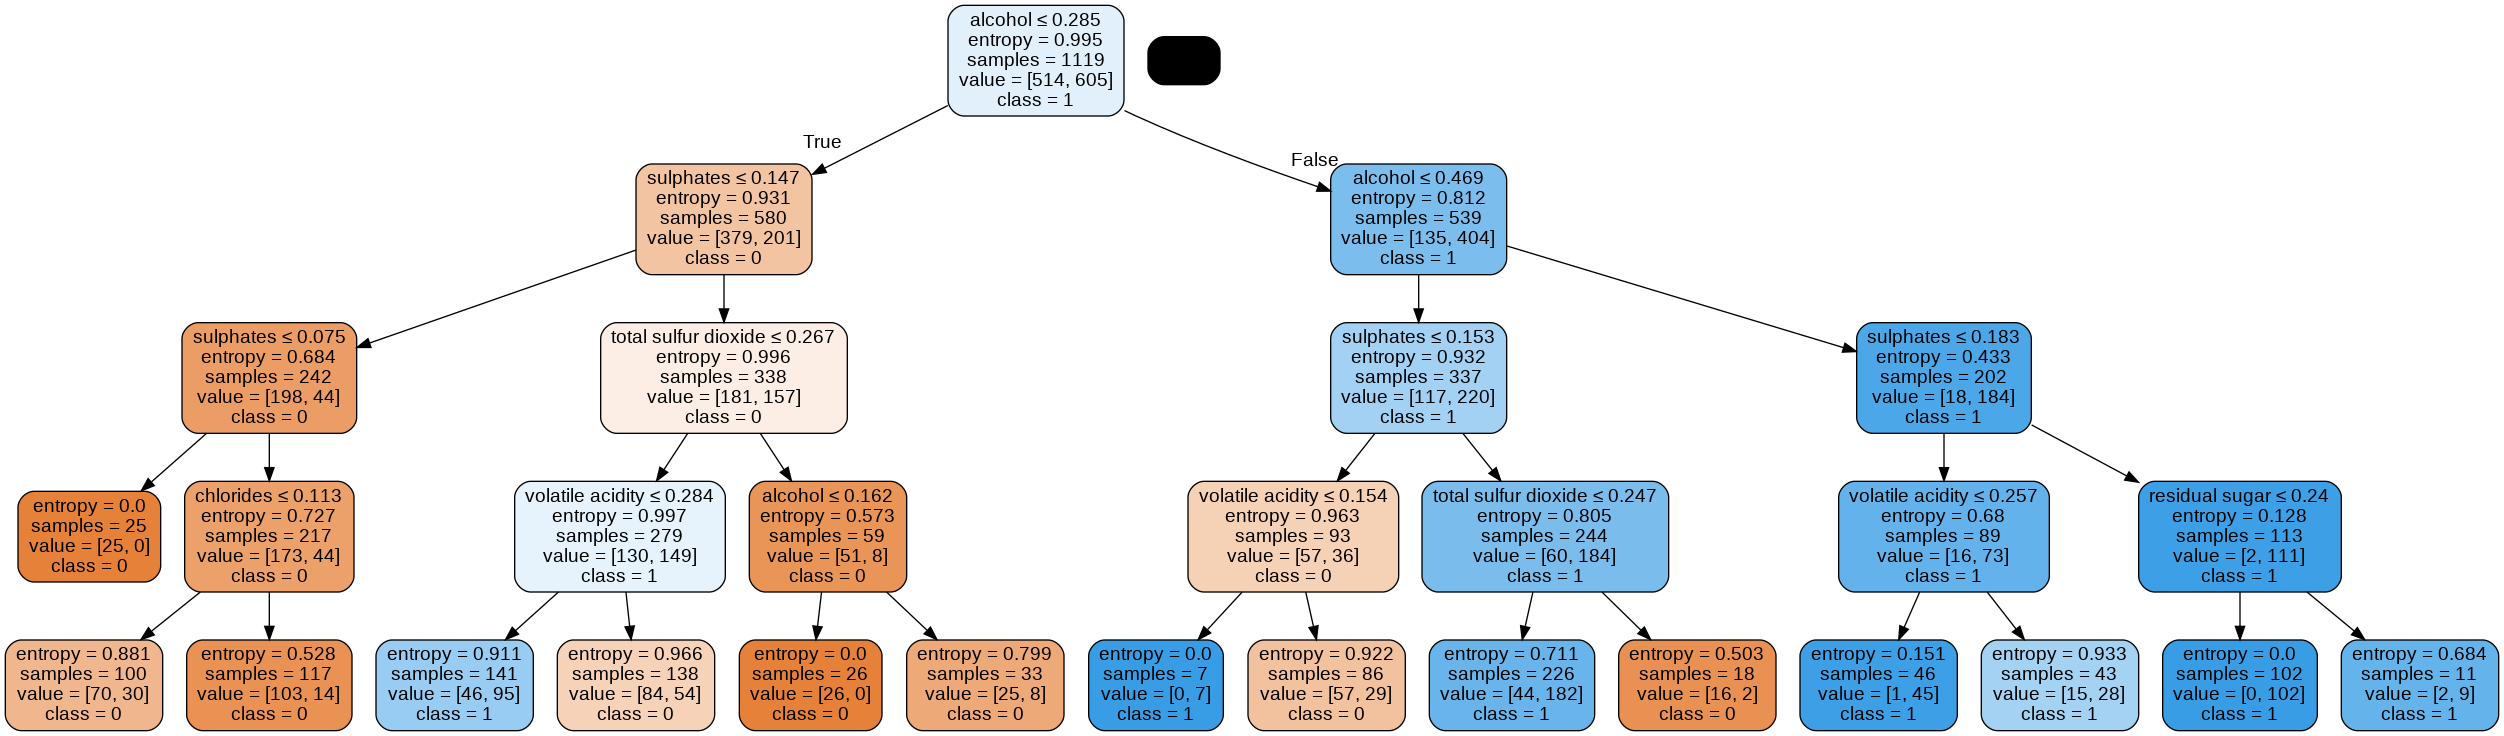

In [ ]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine_predict.png')
Image(graph.create_png())

#Save Model

In [ ]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(clf, open(filename, 'wb'))

# Deployment

In [ ]:
list_of_columns = data.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['quality'], axis='columns', inplace=True)


input_data.at[0, 'fixed acidity'] = float(input('Enter Fixed Acidity Content '))
input_data.at[0, 'volatile acidity'] = float(input('Enter Volatile Acidity Content '))
input_data.at[0, 'citric acid'] = float(input('Enter Citric Acid Content '))
input_data.at[0, 'residual sugar'] = float(input('Enter residual Sugar Content '))
input_data.at[0, 'chlorides'] = float(input('Enter Chlorides Content '))
input_data.at[0, 'free sulfur dioxide'] = float(input('Enter Free Sulphur Dioxide Content '))
input_data.at[0, 'total sulfur dioxide'] = float(input('Enter total Sulphur Dioxide Content'))
input_data.at[0, 'density'] = float(input('Enter Density Content'))
input_data.at[0, 'sulphates'] = float(input('Enter Sulphates Content'))
input_data.at[0, 'alcohol'] = float(input('Enter Alcohol Content'))

Enter Fixed Acidity Content 7.4
Enter Volatile Acidity Content 0.7
Enter Citric Acid Content 0
Enter residual Sugar Content 1.9
Enter Chlorides Content 0.076
Enter Free Sulphur Dioxide Content 11
Enter total Sulphur Dioxide Content34
Enter Density Content0.9978
Enter Sulphates Content0.56
Enter Alcohol Content9.4


Denormalize

In [ ]:
input_data['fixed acidity']=(input_data['fixed acidity']-fixed_min)/(fixed_max-fixed_min)
input_data['volatile acidity']=(input_data['volatile acidity']-volatile_min)/(volatile_max-volatile_min)
input_data['citric acid']=(input_data['citric acid']-citric_min)/(citric_max-citric_min)
input_data['residual sugar']=(input_data['residual sugar']-residual_min)/(residual_max-residual_min)
input_data['chlorides']=(input_data['chlorides']-chlorides_min)/(chlorides_max-chlorides_min)
input_data['free sulfur dioxide']=(input_data['free sulfur dioxide']-free_min)/(free_max-free_min)
input_data['total sulfur dioxide']=(input_data['total sulfur dioxide']-total_min)/(total_max-total_min)
input_data['density']=(input_data['density']-density_min)/(density_max-density_min)
input_data['sulphates']=(input_data['sulphates']-sulphates_min)/(sulphates_max-sulphates_min)
input_data['alcohol']=(input_data['alcohol']-alcohol_min)/(alcohol_max-alcohol_min)

y_pred =  clf.predict(input_data)
quality = y_pred*(quality_max-quality_min)+quality_min
if quality == 1:
  print('The wine quality is good.')
else:
  print('The quality of wine is bad.')

The quality of wine is bad.


#Thank You